In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [ ]:
# Load dataset
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Check for missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### Descriptive Statistics

In [ ]:

print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  


### Handling Missing or Erroneous Data
Some of the features, such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI, may contain zero values which are not realistic for medical data. We will check to see if there are missing values

In [ ]:
# Replace zero values with NaN for specific columns
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zero:
    data[col].replace(0, np.nan, inplace=True)


<ipython-input-77-46343bbabc28>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(0, np.nan, inplace=True)


In [ ]:
# Check missing values again
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Impute missing values with the median
data.fillna(data.median(), inplace=True)


### Exploratory Data Analysis (EDA)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


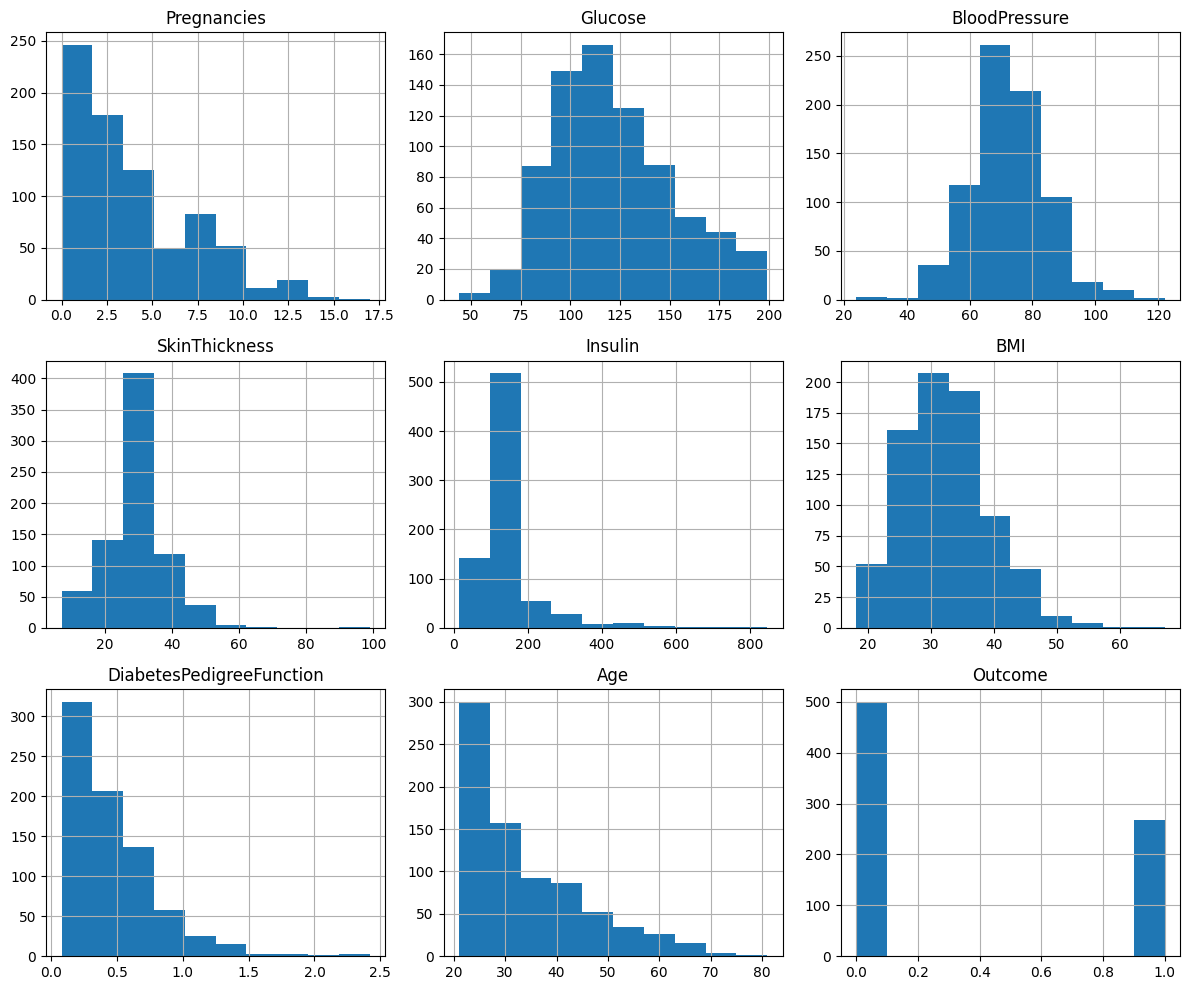

In [ ]:
# Plot histograms for each feature
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


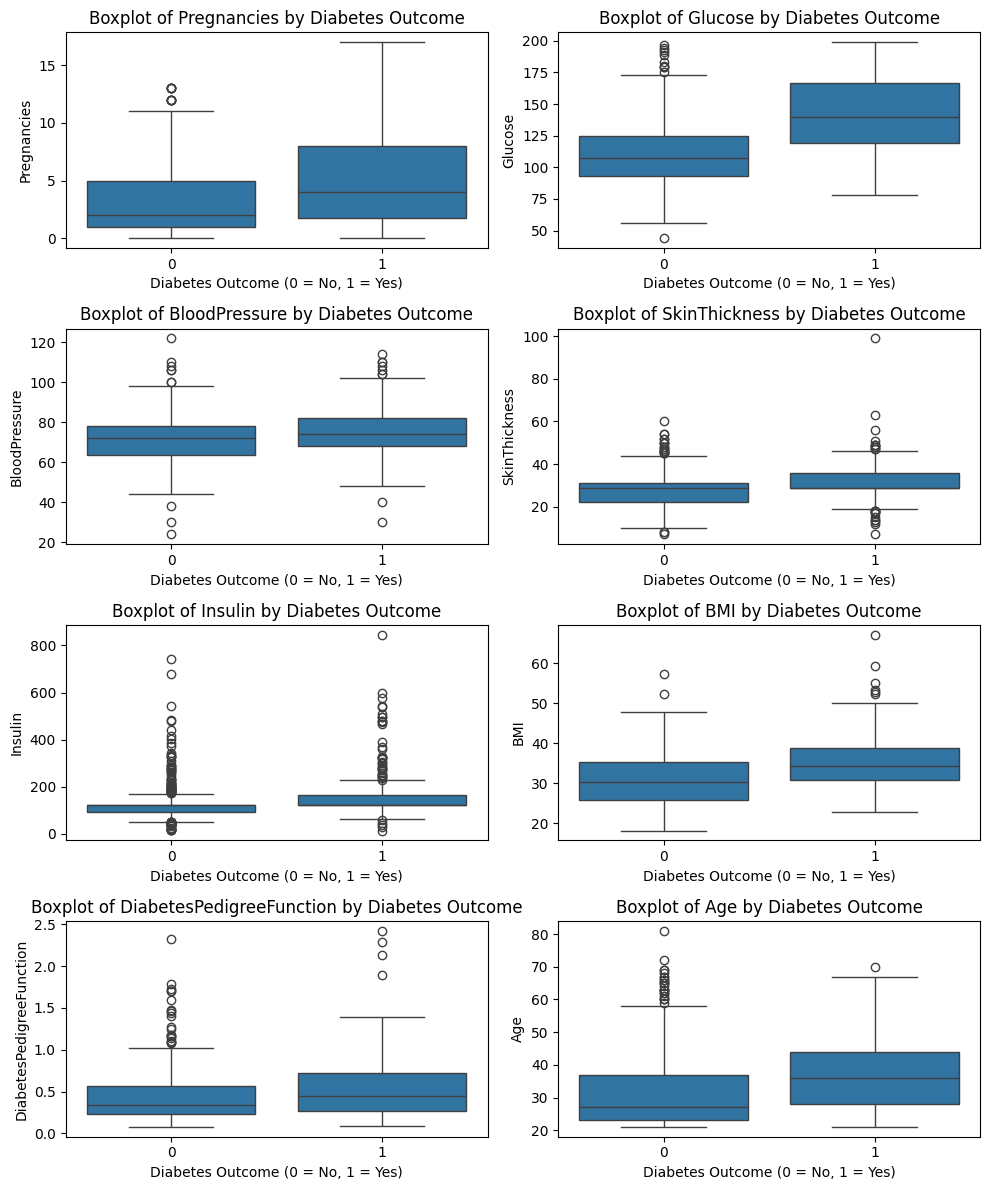

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to plot
columns_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a grid of boxplots for each column
plt.figure(figsize=(10, 12))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=data, x='Outcome', y=col)
    plt.title(f'Boxplot of {col} by Diabetes Outcome')
    plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

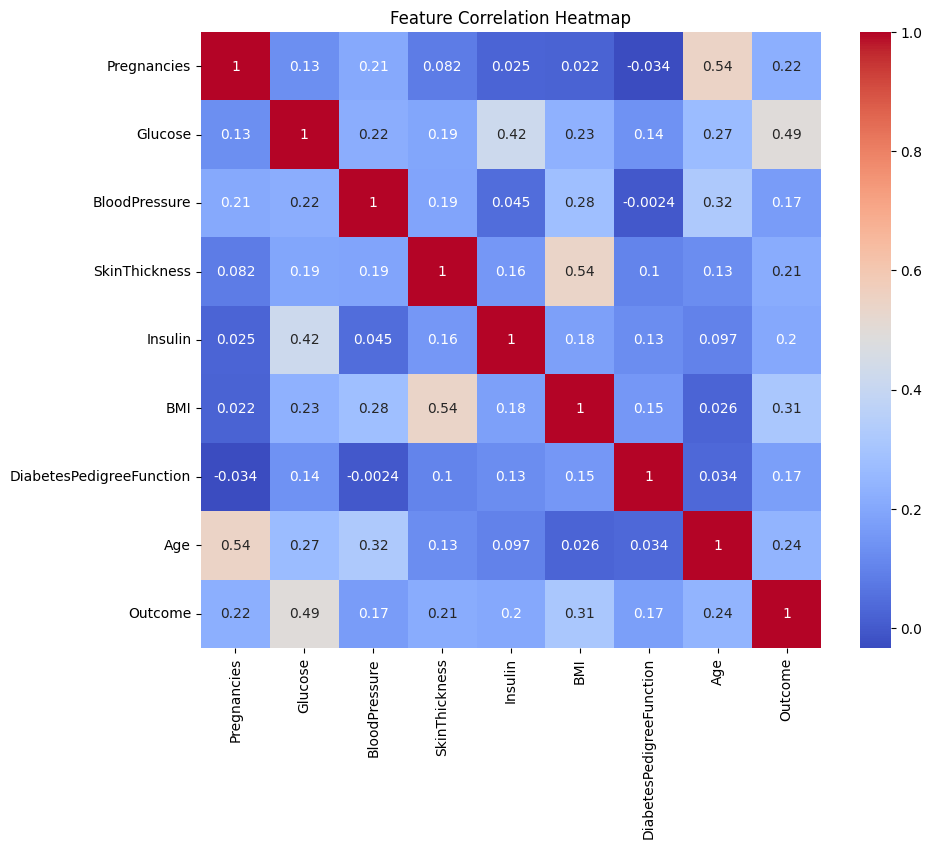

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## Models and Methods

### Data Splitting
To predict whether or not a patient has diabetes, I decided to use multiple different classification models and see which one performs the best in predicting diabetes outcomes and accounting for the variation in my data. For each of these models, I decided to utilize an 80-20 train-test split, training my models on 80% of the data and then testing them on the remaining 20%. The prospective models I will use include Logistic Regression, Random Forest, and Gradient Boosting as the additional model to compare performance and assess predictive accuracy.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [ ]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




### Baseline Model

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Target variable
y = data['Outcome']


In [ ]:
# Baseline: Predict the most frequent class
most_frequent_class = y.mode()[0]  # Mode of the target variable
baseline_preds = [most_frequent_class] * len(y)  # Predict the mode for all instances

In [ ]:
# Calculate baseline accuracy
baseline_accuracy = accuracy_score(y, baseline_preds)

print("Baseline Accuracy (Most Frequent Class):", baseline_accuracy)

Baseline Accuracy (Most Frequent Class): 0.6510416666666666





### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

In [ ]:
# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



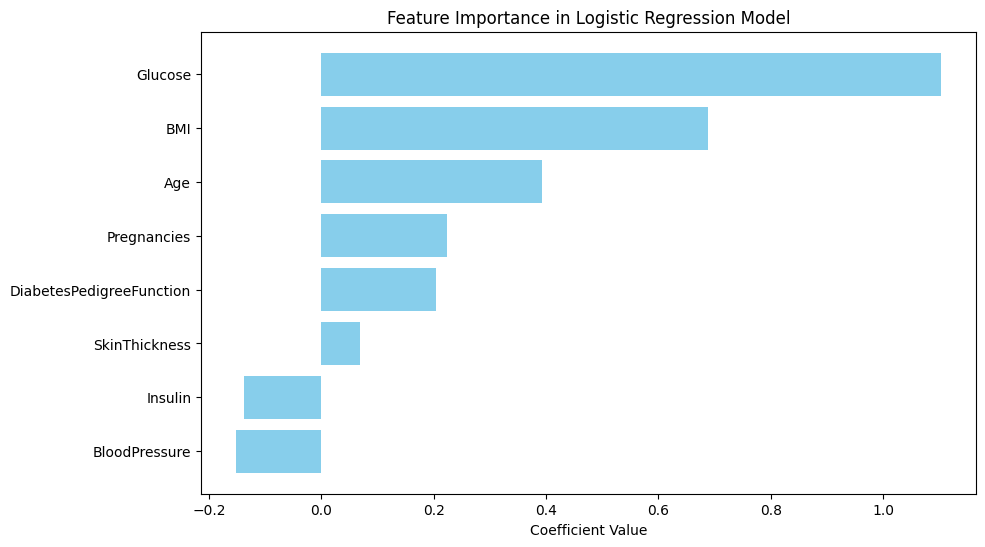

In [ ]:
# Extract feature importance (coefficients)
feature_importance = logreg.coef_[0]

# Create a DataFrame for visualization
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


### Random Forest

In [ ]:
# Create X (features) and y (target)
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


In [ ]:
# Create a column transformer to scale the numerical features
transformer = make_column_transformer(
    (StandardScaler(), X.columns),  # Scale all numerical columns
    remainder='passthrough')

In [ ]:
# Create a pipeline for the Random Forest model
pipe = Pipeline([
    ('scale', transformer),
    ('model', RandomForestClassifier(random_state=20))
])

In [ ]:
# Define a grid of hyperparameters for the number of estimators and max depth
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [3, 4, 5, 6, 10]
}

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(random_state=20))]),
             param_grid={'model__max_depth': [3, 4, 5, 6, 10],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# Get the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'model__max_depth': 5, 'model__n_estimators': 100}
Best Cross-Validation Score: 0.7784886045581768


In [ ]:
# Evaluate the model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.7337662337662337

Random Forest Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       101
           1       0.66      0.47      0.55        53

    accuracy                           0.73       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



In [ ]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Extract feature importance
feature_importance = rf.feature_importances_

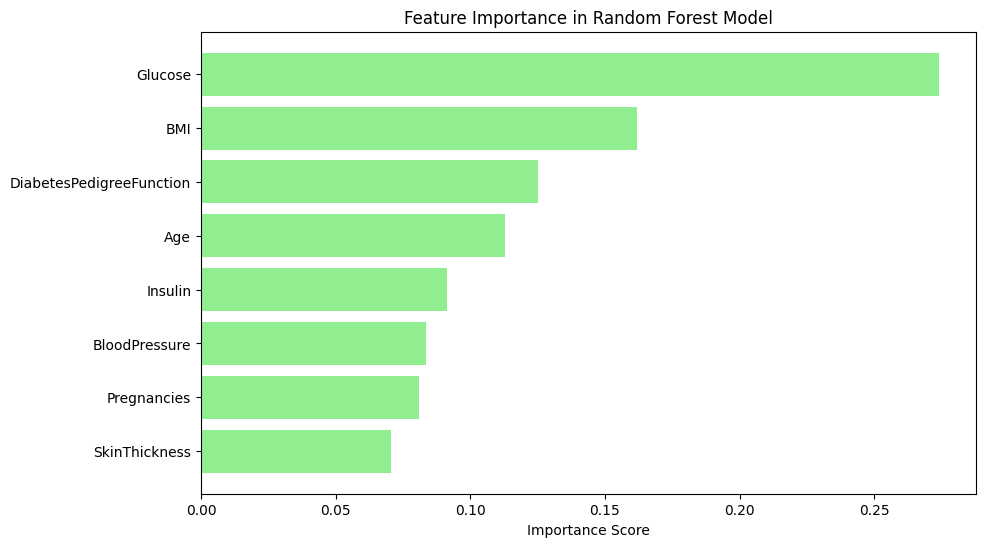

In [ ]:
# Create a DataFrame for visualization
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance Score')
plt.title('Feature Importance in Random Forest Model')
plt.show()


### Gradient Boosting

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold


In [ ]:
# Define features and target
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 3. Define a function for model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print("\nEvaluation Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Diabetes", "Diabetes"],
                yticklabels=["No Diabetes", "Diabetes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

In [ ]:
# 4. Define parameter grid for RandomizedSearchCV (reduced grid)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

In [ ]:
# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

In [ ]:
# Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
# Perform RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid,
    n_iter=20,  # Randomly try 20 parameter combinations
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42)

In [ ]:
# Fit the RandomizedSearchCV
print("\nPerforming Hyperparameter Tuning with RandomizedSearchCV...")
randomized_search.fit(X_train, y_train)


Performing Hyperparameter Tuning with RandomizedSearchCV...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 100, 150],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [ ]:
# Get the best estimator
print("\nBest Parameters:", randomized_search.best_params_)
best_gbc = randomized_search.best_estimator_


Best Parameters: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05}



Evaluation Metrics:
Accuracy: 0.7272727272727273
Precision: 0.6428571428571429
Recall: 0.5
F1 Score: 0.5625
ROC-AUC: 0.8124074074074074

Confusion Matrix:


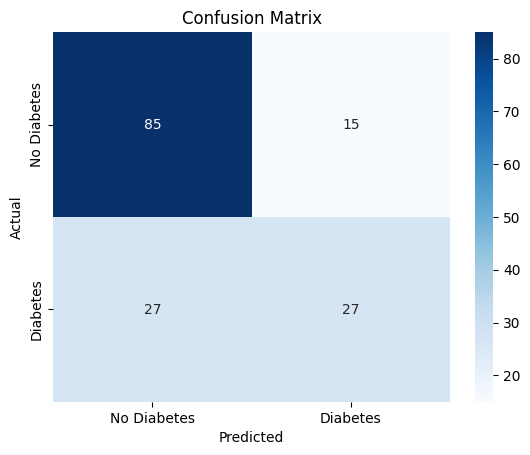


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



In [ ]:
# 5. Evaluate the best model on the test set
evaluate_model(best_gbc, X_test, y_test)

In [ ]:
# 6. Feature Importance Visualization
feature_importances = best_gbc.feature_importances_
features = X.columns

<ipython-input-150-e030783b3d8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


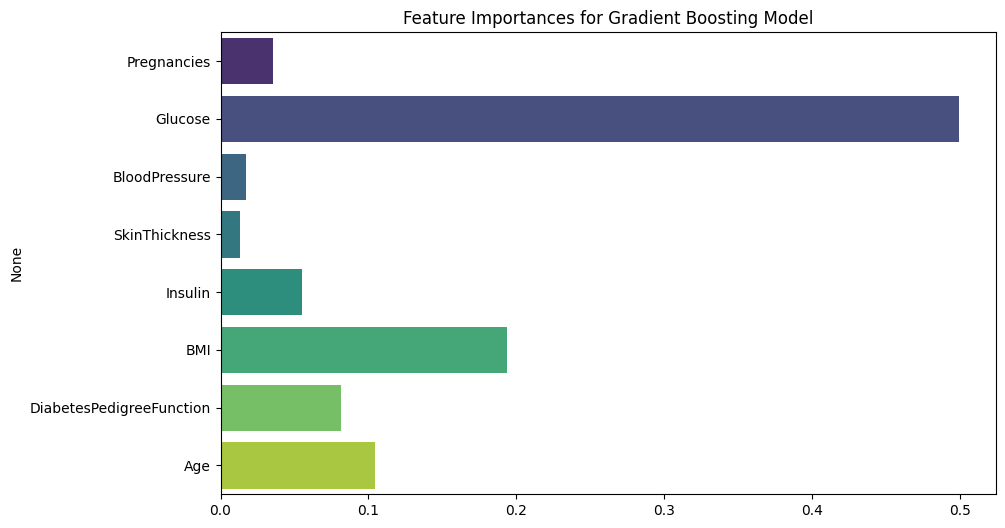

In [ ]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title("Feature Importances Of Gradient Boosting Model")
plt.show()


## Result and Interpretation

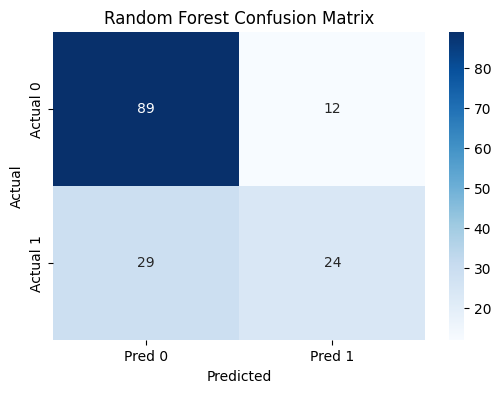

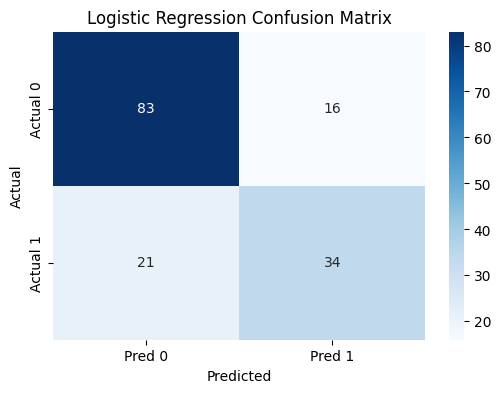

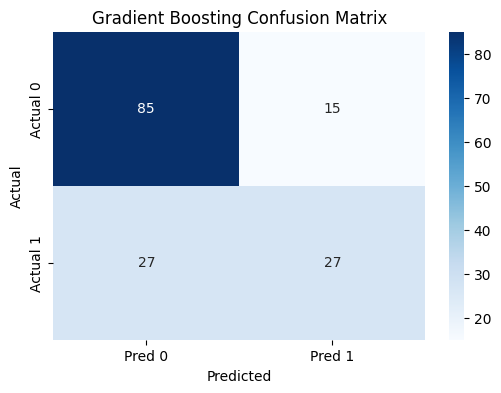

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to compute confusion matrix based on recall, precision, and support
def compute_confusion_matrix(precision, recall, support):

    TP = int(recall[1] * support[1])
    FN = support[1] - TP
    FP = int((TP / precision[1]) - TP)
    TN = support[0] - FP
    return np.array([[TN, FP], [FN, TP]])

# Metrics for each model
# Random Forest Metrics
rf_precision = [0.76, 0.66]
rf_recall = [0.87, 0.47]
rf_support = [101, 53]

# Logistic Regression Metrics
lr_precision = [0.80, 0.67]
lr_recall = [0.83, 0.62]
lr_support = [99, 55]

# Gradient Boosting Metrics
model3_precision = [0.76, 0.64]
model3_recall = [0.85, 0.50]
model3_support = [100, 54]

# Compute Confusion Matrices
rf_cm = compute_confusion_matrix(rf_precision, rf_recall, rf_support)
lr_cm = compute_confusion_matrix(lr_precision, lr_recall, lr_support)
model3_cm = compute_confusion_matrix(model3_precision, model3_recall, model3_support)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot Confusion Matrices
plot_confusion_matrix(rf_cm, "Random Forest Confusion Matrix")
plot_confusion_matrix(lr_cm, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(model3_cm, "Gradient Boosting Confusion Matrix")